<a href="https://colab.research.google.com/github/jvidorreta/TFG_SDG_JVID/blob/dev/TFG_SDG_JVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = '/content/drive/MyDrive/Colab Notebooks/BBDD-Local.xlsx'

df = pd.read_excel(file_path,sheet_name='C_BBDD')

In [ ]:
df.info() #muestra información sobre el tipo de datos de las columnas, el número de filas y cuántos valores nulos hay en el DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16041 entries, 0 to 16040
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        16041 non-null  int64         
 1   Tipo                      16041 non-null  object        
 2   Categoría                 1147 non-null   object        
 3   Categoría.1               7555 non-null   object        
 4   Categoría.2               3392 non-null   object        
 5   Categoría Final           16041 non-null  object        
 6   Fecha de creación         16041 non-null  datetime64[ns]
 7   Fecha solución propuesta  14606 non-null  datetime64[ns]
 8   Subcategoría              7555 non-null   object        
 9   Fecha de modificación     16041 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 1.2+ MB


# Variables 
**ID:** Número de usuario que realiza la petición

**Tipo:** Sección a la que está relacionada la petición

**Categoría:** Subcategoría del tipo más concreto

**Categoría Final:** Aquí hemos agrupado en una única columna las 3 columnas de Categoría y la de tipo ya que solo habrá un único valor en estas 4 columnas, esta columna será la que se utilice para el analisis.

**Fecha de creación:** Fecha y hora en la cual se crea la petición.

**Fecha solución propuesta:** Fecha y hora en la que se estima que se va a resolver la petición.

**Subcategoría:** Subcategoría asocida a la que hace la petición.

**Fecha de modificación:** Fecha y hora en la cual se resuelve la petición.



In [5]:
#Cambiamos el nombre de algunas columnas para poder trabajar con ellas mas adelante

df.rename(columns={'Categoría Final': 'Categoria_Final'}, inplace=True)
df.rename(columns={'Fecha de creación': 'Fecha_de_creacion'}, inplace=True)
df.rename(columns={'Fecha solución propuesta': 'Categoria_Final'}, inplace=True)
df.rename(columns={'Fecha de modificación': 'Fecha_de_modificacion'}, inplace=True)

#El inplace = True hace que las modificaciones se hagan sobr el df actual en vez de crear un 
#nuevo df con las nuevas modificaciones


In [ ]:
print(df.shape) #Muestra el nº de filas y columnas en la BBDD

(16041, 10)


In [ ]:
df.describe(include = 'all') #Muestra una descripción por columnas de la BBDD
                           

<ipython-input-6-71966d3f17ce>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all') #Muestra una descripción por columnas de la BBDD


,ID,Tipo,Categoría,Categoría.1,Categoría.2,Categoria_Final,Fecha_de_creacion,Categoria_Final,Subcategoría,Fecha_de_modificacion
count,1.604100e+04,16041,1147,7555,3392,16041,16041,14606,7555,16041
unique,NaN,7,3,6,2,15,15867,1691,13,13529
top,NaN,Herramientas,Extracción de datos,Uso de QLIK SENSE,Consulta sobre el modelo de datos,Uso de QLIK SENSE,2016-12-27 10:34:00,2021-08-01 12:00:00,Accesos,2022-11-16 11:30:00
freq,NaN,7555,774,3950,3077,3950,3,166,4634,12
first,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-23 10:22:00,2016-09-16 12:00:00,NaN,2016-09-01 16:14:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-30 14:32:00,2022-12-30 12:00:00,NaN,2022-12-31 09:50:00
mean,8.369551e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.238160e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.783170e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.351280e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Por defecto solo muestra las que contienen numeros, para que muestre todo hace falta incluir el (include = 'all')


Este método te proporciona un resumen estadístico de las columnas numéricas de un DataFrame, incluyendo la media, la desviación estándar, la mediana, los cuartiles, el mínimo y el máximo.


In [ ]:
print(df.columns) #Muestra los nombres de las columnas en un DataFrame.

Index(['ID', 'Tipo', 'Categoría', 'Categoría.1', 'Categoría.2',
       'Categoria_Final', 'Fecha_de_creacion', 'Categoria_Final',
       'Subcategoría', 'Fecha_de_modificacion'],
      dtype='object')


In [ ]:
print(df["ID"].value_counts())


1165252    1
727747     1
728614     1
728573     1
728572     1
          ..
984860     1
984859     1
984853     1
984849     1
378317     1
Name: ID, Length: 16041, dtype: int64


In [ ]:

#Creo que esto no hace falta ya que lo reconoce como objeto de data

df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'], format='%d/%m/%Y %H:%M')
df['Fecha solución propuesta'] = pd.to_datetime(df['Fecha solución propuesta'], format='%d/%m/%Y %H:%M')
df['Fecha de modificación'] = pd.to_datetime(df['Fecha de modificación'], format='%d/%m/%Y %H:%M')
#Cambiamos el formato del df de las fechas de un formato que no lo reconoce jupyter notebook a un formato 
# que si reconoce y entonces podemos pasar ya a un mejor analisis


In [ ]:
df.describe #ahora si que reconoce la fecha de creacion/resolucion con formato de fecha

<bound method NDFrame.describe of             ID               Tipo            Categoría        Categoría.1  \
0      1165252       Extracciones  Extracción de datos                NaN   
1      1165248       Extracciones  Extracción de datos                NaN   
2      1165245     Gestión de KDE                  NaN                NaN   
3      1165034       Herramientas                  NaN  Uso de QLIK SENSE   
4      1164938       Herramientas                  NaN  Uso de QLIK SENSE   
...        ...                ...                  ...                ...   
16036   380375  Permisos Datapool                  NaN                NaN   
16037   380373    Modelo de Datos                  NaN                NaN   
16038   378538  Permisos Datapool                  NaN                NaN   
16039   378533    Modelo de Datos                  NaN                NaN   
16040   378317    Modelo de Datos                  NaN                NaN   

                             Categoría.2 

In [3]:
df = df.drop(columns=['Categoría','Categoría.1','Categoría.2','Subcategoría'], axis=0) #axis = 1 --> se borra una columna
                                              #axis = 0 --> se borra una fila 

In [4]:
df.describe(include = 'all')

<ipython-input-4-74aa2f970831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,ID,Tipo,Categoría Final,Fecha de creación,Fecha solución propuesta,Fecha de modificación
count,1.604100e+04,16041,16041,16041,14606,16041
unique,NaN,7,15,15867,1691,13529
top,NaN,Herramientas,Uso de QLIK SENSE,2016-12-27 10:34:00,2021-08-01 12:00:00,2022-11-16 11:30:00
freq,NaN,7555,3950,3,166,12
first,NaN,NaN,NaN,2016-08-23 10:22:00,2016-09-16 12:00:00,2016-09-01 16:14:00
last,NaN,NaN,NaN,2022-12-30 14:32:00,2022-12-30 12:00:00,2022-12-31 09:50:00
mean,8.369551e+05,NaN,NaN,NaN,NaN,NaN
std,2.238160e+05,NaN,NaN,NaN,NaN,NaN
min,3.783170e+05,NaN,NaN,NaN,NaN,NaN
25%,6.351280e+05,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['date']= pd.to_datetime(df.Fecha_de_modificacion)

<ipython-input-14-889268fab435>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']= pd.to_datetime(df.Fecha_de_modificacion)


In [ ]:
df['Year'] = pd.DatetimeIndex(df.date).year
df['Month'] = pd.DatetimeIndex(df.date).month
df['Day'] = pd.DatetimeIndex(df.date).day
df['weekday'] = pd.DatetimeIndex(df.date).weekday

<ipython-input-15-7edfa3a94edf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.DatetimeIndex(df.date).year
<ipython-input-15-7edfa3a94edf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.DatetimeIndex(df.date).month


In [ ]:
df.describe

<bound method NDFrame.describe of             ID               Tipo                    Categoria_Final  \
0      1165252       Extracciones                Extracción de datos   
1      1165248       Extracciones                Extracción de datos   
2      1165245     Gestión de KDE                     Gestión de KDE   
3      1165034       Herramientas                  Uso de QLIK SENSE   
4      1164938       Herramientas                  Uso de QLIK SENSE   
...        ...                ...                                ...   
16036   380375  Permisos Datapool                  Permisos Datapool   
16037   380373    Modelo de Datos  Consulta sobre el modelo de datos   
16038   378538  Permisos Datapool                  Permisos Datapool   
16039   378533    Modelo de Datos  Consulta sobre el modelo de datos   
16040   378317    Modelo de Datos  Consulta sobre el modelo de datos   

        Fecha_de_creacion Categoria_Final Fecha_de_modificacion  \
0     2022-12-30 14:32:00         

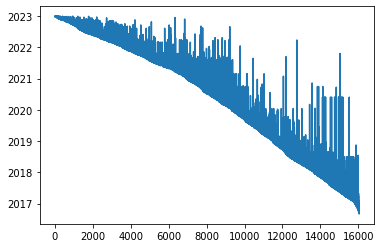

In [ ]:
df.Fecha_de_modificacion.plot(x='Fecha_de_modificacion',y='Month')

In [ ]:
df.monthly_counts.plot()


AttributeError: ignored

In [ ]:
df.set_index('date',inplace=True)


In [ ]:

monthly_counts = df.groupby('month').size().reset_index(name='count')

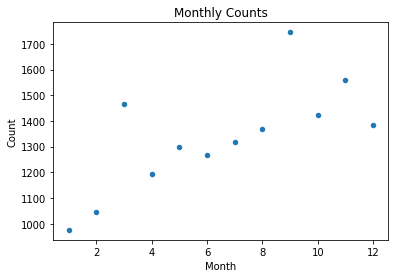

In [ ]:
monthly_counts.plot(x='month', y='count', kind='scatter')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Counts')

plt.show()

In [ ]:
yearly_counts = df.groupby('Year').size().reset_index(name='count')

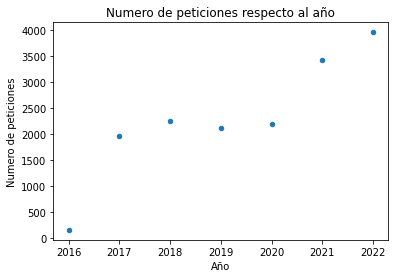

In [ ]:
yearly_counts.plot(x='Year', y='count',kind = 'scatter')

plt.xlabel('Año')
plt.ylabel('Numero de peticiones')
plt.title('Numero de peticiones respecto al año')

plt.show()

In [ ]:
FM_counts = df.groupby('Fecha_de_modificacion').size().reset_index(name='count')

KeyError: ignored

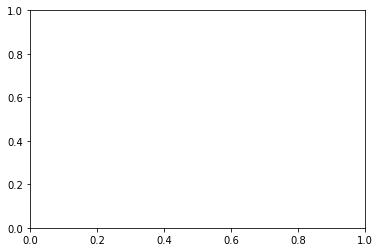

In [ ]:
FM_counts.plot(x='Fecha_de_modficacion', y='count',kind = 'scatter')

plt.xlabel('Año')
plt.ylabel('Numero de peticiones')
plt.title('Numero de peticiones respecto al año')

plt.show()

In [ ]:
df.describe


<bound method NDFrame.describe of                           ID               Tipo  \
date                                              
2022-12-30 15:19:00  1165252       Extracciones   
2022-12-30 15:18:00  1165248       Extracciones   
2022-12-30 15:56:00  1165245     Gestión de KDE   
2022-12-30 10:25:00  1165034       Herramientas   
2022-12-29 17:44:00  1164938       Herramientas   
...                      ...                ...   
2016-09-01 16:31:00   380375  Permisos Datapool   
2016-11-09 10:39:00   380373    Modelo de Datos   
2016-09-14 13:44:00   378538  Permisos Datapool   
2016-09-14 12:53:00   378533    Modelo de Datos   
2016-09-14 13:44:00   378317    Modelo de Datos   

                                       Categoria_Final   Fecha_de_creacion  \
date                                                                         
2022-12-30 15:19:00                Extracción de datos 2022-12-30 14:32:00   
2022-12-30 15:18:00                Extracción de datos 2022-12-30 14

In [ ]:
yearly_counts.describe


<bound method NDFrame.describe of    Year  count
0  2016    155
1  2017   1965
2  2018   2242
3  2019   2108
4  2020   2192
5  2021   3424
6  2022   3955>

In [ ]:
monthly_counts.describe

<bound method NDFrame.describe of     month  count
0       1    976
1       2   1044
2       3   1467
3       4   1192
4       5   1298
5       6   1268
6       7   1318
7       8   1367
8       9   1745
9      10   1424
10     11   1558
11     12   1384>

In [ ]:
FM_counts.describe

<bound method NDFrame.describe of       Fecha_de_modificacion  count
0       2016-09-01 16:14:00      1
1       2016-09-01 16:31:00      1
2       2016-09-14 12:53:00      1
3       2016-09-14 13:44:00      2
4       2016-09-15 14:40:00      1
...                     ...    ...
13524   2022-12-30 15:19:00      1
13525   2022-12-30 15:56:00      2
13526   2022-12-30 16:49:00      1
13527   2022-12-30 17:35:00      1
13528   2022-12-31 09:50:00      1

[13529 rows x 2 columns]>

In [15]:
data_2016 = df[df.Fecha_de_modificacion < '2017-01-01 00:00']
data_2017 = df[(df.Fecha_de_modificacion < '2018-01-01 00:00') & (df.Fecha_de_modificacion > '2017-01-01 00:00')]
data_2018 = df[(df.Fecha_de_modificacion < '2019-01-01 00:00') & (df.Fecha_de_modificacion > '2018-01-01 00:00')]
data_2019 = df[(df.Fecha_de_modificacion < '2020-01-01 00:00') & (df.Fecha_de_modificacion > '2019-01-01 00:00')]
data_2020 = df[(df.Fecha_de_modificacion < '2021-01-01 00:00') & (df.Fecha_de_modificacion > '2020-01-01 00:00')]
data_2021 = df[(df.Fecha_de_modificacion < '2022-01-01 00:00') & (df.Fecha_de_modificacion > '2021-01-01 00:00')]
data_2022 = df[(df.Fecha_de_modificacion < '2023-01-01 00:00') & (df.Fecha_de_modificacion > '2022-01-01 00:00')]
data_2022

,ID,Tipo,Categoria_Final,Fecha_de_creacion,Categoria_Final,Fecha_de_modificacion
0,1165252,Extracciones,Extracción de datos,2022-12-30 14:32:00,NaT,2022-12-30 15:19:00
1,1165248,Extracciones,Extracción de datos,2022-12-30 14:23:00,NaT,2022-12-30 15:18:00
2,1165245,Gestión de KDE,Gestión de KDE,2022-12-30 14:11:00,NaT,2022-12-30 15:56:00
3,1165034,Herramientas,Uso de QLIK SENSE,2022-12-30 01:09:00,NaT,2022-12-30 10:25:00
4,1164938,Herramientas,Uso de QLIK SENSE,2022-12-29 17:17:00,NaT,2022-12-29 17:44:00
...,...,...,...,...,...,...
8968,839347,Modelo de Datos,Consulta sobre el modelo de datos,2020-02-20 18:25:00,2022-02-21 12:00:00,2022-03-20 20:19:00
9182,827847,Modelo de Datos,Consulta sobre el modelo de datos,2020-01-22 17:11:00,2022-03-04 12:00:00,2022-03-31 18:36:00
9219,825999,Modelo de Datos,Consulta sobre el modelo de datos,2020-01-17 11:04:00,2022-02-18 12:00:00,2022-08-31 08:27:00
9768,791307,Modelo de Datos,Consulta sobre el modelo de datos,2019-10-15 12:43:00,2021-02-26 12:00:00,2022-01-18 11:48:00
